# Model Selection 모듈 소개

## 학습/테스트 데이터 셋 분리 – train_test_split()

### 사이킷런 model_selection 모듈의 주요 기능
- 학습 데이터와 테스트 데이터 세트 분리
- 교차 검증 분할 및 평가
- Estimator의 하이퍼 파라미터 튜닝

**train_test_split() 반환값**

* X_train : 학습용 피처 데이터 세트(feature)
* X_test : 테스트용 피처 데이터 세트(feature)
* y_train : 학습용 레이블 데이터 세트(target)
* y_test : 테스트용 레이블 데이터 세트(target)
* feature : 대문자 X_
* label(target) : 소문자 y_

### (1) 학습/테스트 데이터 셋 분리하지 않고 예측

In [1]:
# (1) 학습/테스트 데이터 셋 분리하지 않고 예측

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris_data = load_iris()
dt_clf = DecisionTreeClassifier()

train_data = iris_data.data
train_label = iris_data.target

# 학습 수행
dt_clf.fit(train_data, train_label)

# 테스트
pred = dt_clf.predict(train_data)
print('예측 정확도 : ', accuracy_score(train_label, pred))

예측 정확도 :  1.0


### (2) 학습/테스트 데이터 셋 분리하고 예측

In [2]:
# (2) 학습/테스트 데이터 셋 분리하고 예측 

X = iris_data.data
y = iris_data.target

# 학습 / 테스트 분할(split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [3]:
# 학습 수행
dt_clf.fit(X_train, y_train)

# 예측 수행
pred = dt_clf.predict(X_test)
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))


예측정확도: 0.9111


**넘파이 뿐만 아니라 판다스 DataFrame도 train_test_split() 으로 분할 가능**

In [4]:
import pandas as pd

iris_df = pd.DataFrame(X, columns = iris_data.feature_names)
iris_df['target'] = y
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# 피처 데이터프레임 반환 (마지막 열 전까지, 마지막 열 제외)
feature_df = iris_df.iloc[:, :-1]

# 타깃 데이터프레임 반환

target_df = iris_df.iloc[:,-1]

# 학습/테스트 데이터 분할
X_train , X_test , y_train , y_test = train_test_split(feature_df , target_df, test_size=0.3 , random_state=10)

In [18]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측정확도 : 0.9778


## Data Split과 모델 검증

### 홀드-아웃 방식


### 교차검증(Cross Validation, CV)

### 교차 검증 방법
- K 폴드 교차 검증
- Stratified K 폴드 교차 검증

### K 폴드 교차 검증


**K 폴드 교차 검증 프로세스 구현을 위한 사이킷런 클래스**

(1) KFold 클래스 : 폴드 세트로 분리하는 객체 생성
- kfold = KFold(n_splits=5)

(2) split() 메소드 : 폴드 데이터 세트로 분리
- kfold.split(features)
- 각 폴드마다  
    학습용, 검증용, 테스트 데이터 추출  
    학습용 및 예측 수행  
    정확도 측정  
    
(3) 최종 평균 정확도 계산

* K 폴드 예제

In [19]:
# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

iris = load_iris()
X = iris.data
y = iris.target

In [20]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=56)

# 5개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=5)

# 폴드 세트별 정확도를 담을 리스트 객체 생성
cv_acc = []

In [24]:
# 폴드 별 학습용, 검증용 데이터 세트의 행 인덱스 확인
for train_index, val_index in kfold.split(X):
    print(train_index, val_index)

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 1

In [28]:
import numpy as np
for train_index, val_index in kfold.split(X):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[val_index]
    y_test = y[val_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    acc = np.round(accuracy_score(y_test, pred), 3)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print(f'정확도 : {acc}, 학습데이터 크기 : {train_size}, 검증데이터 크기 : {test_size}')
    cv_acc.append(acc)

print('평균 정확도', np.mean(cv_acc))

정확도 : 1.0, 학습데이터 크기 : 120, 검증데이터 크기 : 30
정확도 : 1.0, 학습데이터 크기 : 120, 검증데이터 크기 : 30
정확도 : 1.0, 학습데이터 크기 : 120, 검증데이터 크기 : 30
정확도 : 1.0, 학습데이터 크기 : 120, 검증데이터 크기 : 30
정확도 : 0.8, 학습데이터 크기 : 120, 검증데이터 크기 : 30
평균 정확도 0.9600000000000002


### Stratified K 폴드 교차 검증
- 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식

### 불균형한 데이터(imbalanced data) 문제
- 관심 대상 데이터가 상대적으로 매우 적은 비율로 나타나는 데이터 문제

- 분류 문제인 경우 : 클래스들이 균일하게 분포하지 않은 문제를 의미

- 회귀 문제인 경우 : 극단값이 포함되어 있는 "치우친" 데이터 사례

**우회/극복하는 방법**
- 데이터 추가 확보
- Re-Sampling

In [32]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']= iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
iris_df['label'].value_counts()

# 레이블 같은 0, 1,2 값 모두 50개로 동일
# 즉, Setosa, versicolor, virginica 각 품종 50개 씩

0    50
1    50
2    50
Name: label, dtype: int64

In [36]:
# 3개 폴드를 구성
kfold = KFold(n_splits=3)

n=0
for train_index, test_index in kfold.split(iris_df):
    n += 1
    train_label = iris_df['label'].iloc[train_index]
    test_label = iris_df['label'].iloc[test_index]
    print('교차검증 : ', n)
    print('학습용 : \n', train_label.value_counts())
    print('검증용 : \n', test_label.value_counts())
    

교차검증 :  1
학습용 : 
 1    50
2    50
Name: label, dtype: int64
검증용 : 
 0    50
Name: label, dtype: int64
교차검증 :  2
학습용 : 
 0    50
2    50
Name: label, dtype: int64
검증용 : 
 1    50
Name: label, dtype: int64
교차검증 :  3
학습용 : 
 0    50
1    50
Name: label, dtype: int64
검증용 : 
 2    50
Name: label, dtype: int64


In [ ]:
########## 참고 : 3개의 폴드 세트로 KFold 교차 검증 : 정확도 : 0 ###########

In [47]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=56)

# iris = load_iris()
# X = iris.data
# y = iris.target

# 3개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=3)

# 폴드 세트별 정확도를 담을 리스트 객체 생성
cv_acc = []

# 필드 세트별 학습, 예측, 정확도 계산
for train_index, test_index in kfold.split(iris.data):
    X_train, X_test= iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 정확도 계산
    acc = accuracy_score(y_test, pred)
    cv_acc.append(acc)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print(f'교차검증{n}회')
    print(f'정확도 : {acc}, 학습데이터 크기 : {train_size}, 검증데이터 크기 : {test_size}')
    n += 1
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 

print('평균 정확도', np.mean(cv_acc))

교차검증3회
정확도 : 0.0, 학습데이터 크기 : 100, 검증데이터 크기 : 50
교차검증4회
정확도 : 0.0, 학습데이터 크기 : 100, 검증데이터 크기 : 50
교차검증5회
정확도 : 0.0, 학습데이터 크기 : 100, 검증데이터 크기 : 50
평균 정확도 0.0


In [48]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=56)

# iris = load_iris()
# X = iris.data
# y = iris.target

# 3개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=3)

# 폴드 세트별 정확도를 담을 리스트 객체 생성
cv_acc = []

# enumerate 사용
for i, (train_index, test_index) in enumerate(kfold.split(iris.data)):
    X_train, X_test= iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 정확도 계산
    acc = accuracy_score(y_test, pred)
    cv_acc.append(acc)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print(f'교차검증{i+1}회')
    print(f'정확도 : {acc}, 학습데이터 크기 : {train_size}, 검증데이터 크기 : {test_size}')
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 

print('평균 정확도', np.mean(cv_acc))

교차검증1회
정확도 : 0.0, 학습데이터 크기 : 100, 검증데이터 크기 : 50
교차검증2회
정확도 : 0.0, 학습데이터 크기 : 100, 검증데이터 크기 : 50
교차검증3회
정확도 : 0.0, 학습데이터 크기 : 100, 검증데이터 크기 : 50
평균 정확도 0.0


In [ ]:
########## 참고 끝   ###########

- 위 코드 결과의 문제점
    - 학습하지 않은 데이터를 검증 데이터로 사용
    - 원할한 학습과 예측이 어려움
    - 검증 정확도는 0

StratifiedKFold 클래스


In [49]:
from sklearn.model_selection import StratifiedKFold

In [53]:
# StratifiedKFold를 이용해 붓꽃 데이터 교차 검증

# 3개의 폴드 세트로 분리하는 StratifiedKFold 객체 생성
st_kfold = StratifiedKFold(n_splits=3)

# 폴드 세트별 정확도를 담을 리스트 객체 생성
cv_acc = []

# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
n=1
for train_idx, test_idx in st_kfold.split(iris_df, iris_df['label']):
    train_label = iris_df['label'].iloc[train_idx]
    test_label = iris_df['label'].iloc[test_idx]
    
    print(f'교차검증 : {n}회')
    print('학습용레이블 분포 : \n', train_label.value_counts())
    print('검증용레이블 분포 : \n', test_label.value_counts())
    n+=1


교차검증 : 1회
학습용레이블 분포 : 
 2    34
0    33
1    33
Name: label, dtype: int64
검증용레이블 분포 : 
 0    17
1    17
2    16
Name: label, dtype: int64
교차검증 : 2회
학습용레이블 분포 : 
 1    34
0    33
2    33
Name: label, dtype: int64
검증용레이블 분포 : 
 0    17
2    17
1    16
Name: label, dtype: int64
교차검증 : 3회
학습용레이블 분포 : 
 0    34
1    33
2    33
Name: label, dtype: int64
검증용레이블 분포 : 
 1    17
2    17
0    16
Name: label, dtype: int64


In [63]:
# StratifiedKFold를 이용해 데이터 교차 검증

dt_clf = DecisionTreeClassifier(random_state=15)

kfold = StratifiedKFold(n_splits=3, shuffle=True)

cv_acc = []
n = 1
for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 정확도 계산
    acc = accuracy_score(y_test, pred)
    cv_acc.append(acc)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print(f'교차검증{n}회')
    print(f'정확도 : {acc}, 학습데이터 크기 : {train_size}, 검증데이터 크기 : {test_size}')
    n += 1
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 

print('평균 정확도', np.mean(cv_acc))

교차검증1회
정확도 : 0.96, 학습데이터 크기 : 100, 검증데이터 크기 : 50
교차검증2회
정확도 : 0.9, 학습데이터 크기 : 100, 검증데이터 크기 : 50
교차검증3회
정확도 : 0.96, 학습데이터 크기 : 100, 검증데이터 크기 : 50
평균 정확도 0.94


## 교차검증을 보다 간편하게 

### cross_val_score( ) 함수


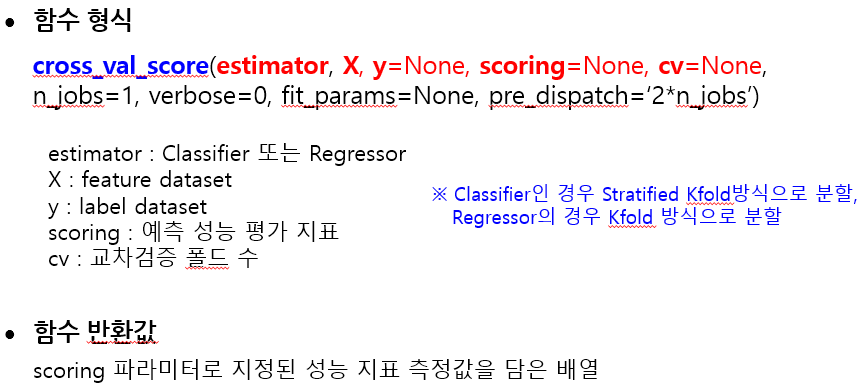

### 붓꽃 자료를 3개 폴드로 분할하여 학습 및 검증

In [67]:
from sklearn.model_selection import cross_val_score, cross_validate
# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

X = iris.data
y = iris.target

score = cross_val_score(dt_clf, X, y, scoring='accuracy', cv=3)
print(f'교차 검증별 정확도 : {score}')
print('평균 정확도', np.mean(score))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 정확도 0.9666666666666667


## 교차 검증과 최적의 하이퍼파라미터 튜닝을 한번에

### 사이킷런의 GridSearchCV클래스

**GridSearchCV 클래스 생성자의 주요 파라미터**

- estimator : classifier, regressor, peipeline


- param_grid : key + 리스트 값을 가지는 딕셔너리 (estimator 튜닝을 위한 하이퍼 파라미터 )
     - key: 파라미터명, 리스트값:파라미터 값
     
     
- scoring : 예측 성능을 측정할 평가 방법 
     - 성능 평가 지표를 지정하는 문자열
     - 예: 정확도인 경우 'accuracy'
     
     
- cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수


- refit : 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습 여부
     - 디폴트 : True    


In [78]:
# GridSearchCV를 이용해
# 결정 트리 알고리즘의 여러 가지 최적화 파라미터를 순차적으로 적용해서
# 붓꽃 데이터 예측 분석

from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

dt_clf = DecisionTreeClassifier()

params = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]} 

min_samples_split : 자식 규칙 노드를 분할해서 만드는데 필요한 최소 샘플 데이터 개수
- min_samples_split=4로 설정하는 경우
    - 최소 샘플 개수가 4개 필요한데
    - 3개만 있는 경우에는 더 이상 자식 규칙 노드를 위한 분할을 하지 않음


트리 깊이도 줄어서 더 간결한 결정 트리 생성


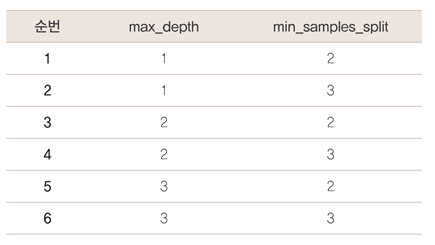

In [79]:
# 
grid_tree = GridSearchCV(dt_clf, param_grid=params, cv=3, refit=True, return_train_score=True)

grid_tree.fit(X_train, y_train)

# scores = grid_tree.cv_results_
# scores

scores_df = pd.DataFrame(grid_tree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001221,0.000565,0.001272,0.000759,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.675,0.700,0.700,0.691667,0.011785,5,0.700,0.6875,0.6875,0.691667,0.005893
1,0.000665,0.000470,0.000676,0.000478,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.675,0.700,0.700,0.691667,0.011785,5,0.700,0.6875,0.6875,0.691667,0.005893
2,0.000704,0.000500,0.000998,0.000815,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,0.950,0.900,0.925000,0.020412,3,0.975,0.9500,0.9625,0.962500,0.010206
3,0.001330,0.000470,0.000663,0.000469,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,0.950,0.900,0.925000,0.020412,3,0.975,0.9500,0.9625,0.962500,0.010206
4,0.001006,0.000030,0.000472,0.000667,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.925,0.975,0.975,0.958333,0.023570,1,0.975,0.9625,0.9750,0.970833,0.005893
5,0.001009,0.000828,0.000664,0.000470,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.925,0.975,0.975,0.958333,0.023570,1,0.975,0.9625,0.9750,0.970833,0.005893


In [ ]:
# 파라미터 확인
grid_tree.cv_results_

In [ ]:
# GridSearchCV 결과 세트로 딕셔너리 형태인 cv_results_ 를 
# DataFrame으로 변환 후 # 일부 파라미터 확인
scores_df = pd.DataFrame(grid_tree.cv_results_)
scores_df

In [84]:
grid_tree.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [81]:
# 최고 성능을 가지는 파라미터 조합 및 예측 성능 1위 값 출력
best_dt = grid_tree.best_estimator_

In [82]:
# GridSearchCV 객체의 생성 파라미터로 refit=True로 설정된 경우(디폴트)
pred = best_dt.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333

In [87]:
grid_tree.best_score_

0.9583333333333334

**일반적인 머신러닝 모델 적용 방법**

- 일반적으로 학습 데이터를 GridSearchCV를 이용해
- 최적 하이퍼 파라미터 튜닝을 수행한 뒤에
- 별도의 테스트 세트에서 이를 평가하는 방식